## Mod 1 Project Submission

**John Kline**  
**FT Data Science Online**  
James / Rafael  
_Scheduled review - Monday, Oct. 28 11AM PST_  
https://katahdin28.github.io/log-transformed_dependent_variables

***

### **Core Analysis Goal:**  
#### _What percent of home price is determined by neighborhood desireability vs. home-specific charactaristics?_  

Lets assume that a real estate investor has a hypothesis that rental rates for homes are primarily determined by home-specific charactaristics, while purchase price is determined by a compbination of neighborhood and home-specific charactaristics.  If this investor can find homes with a high rental rate to price ratio, it will be a more capital-efficient way to generate rental cash flow.

Exploratory Data Analysis Approach Summary:
1. **Import & Review Data File(s)**
    - Check columns with .describe, .info  
    - Review column data types  
    - Identify null values  
<br>
2. **Review Data Content & Plan Analysis**  
    - Check histograms - continuous, binary, categorical data  
    - Evaluate correlations between different dependent variables  
    - Review data for outliers  
    - Identify dependent variable, potential independent variables  
<br>
3. **Narrow Down Variables, Transform Variables**  
    - Kill off obvious unusable variables  
    - Evaluate normality of target variables  
    - Decide on transformations / normalizations / standardizations  
<br>
4. **Run Core Analyses**  
    - Create core multivariate analysis  
    - Create grouped multivariate analyses  
    - Evaluate statistical validity (p-values, skewness, kurtosis)  
    - Evaluate applicability (size of the effect, direction, does it make sense  
<br>
5. **Run Checks & Create Visuals**  
    - Check alternate models, check alternate explanations of effects
    - Create easy to consume graphs / maps of data
<br>    
6. **Conclusion & Recommendations**
    

<div class="alert alert-block alert-info">

## 1. Import & Review Data File(s)
    - Check columns with .describe, .info  
    - Review column data types  
    - Identify null values  

<div class="alert alert-block alert-info">

We have several important features of homes included in the dataset, as well as one obvious dependent variable - price.  The most obvious line of analysis is to investigate the relationship between various home features (e.g. bedrooms, living space sqft, etc.) and the house price. The data is collected over a relatively narrow time period - 2014-2015, so limited macro price growth in the market should be visible in the data.  One of the more interesting areas of dispersion is likely the effect of geography on price.

|**Category**| Description | _Initial commentary_|
|---:|:---|:---|
|**id** | unique identified for a house |_definite keeper - unique id for joining tables_|
|**dateDate** | house was sold  |_narrow date range - may be hard to establish a pattern_|
| **pricePrice** |  is prediction target |_obvious dependent variable_|
| **bedroomsNumber** |  of Bedrooms/House |_important - classic one-line description of house size_|
| **bathroomsNumber** |  of bathrooms/bedrooms| _probably just tracks w/ bedrooms_|
| **sqft_livings** |  footage of the home| _important - you can have 2 4-br homes of wildly diff size_|
| **sqft_lot** |  footage of the lot |_important probably_|
| **floorsTotal** |  floors levels) in house | _unclear_|
| **waterfront** | House which has a view to a waterfront |_probably a positive predictor_|
| **view** | Has been viewed  | _unclear_|
| **condition** | How good the condition is ( Overall )| _hopefully a good indicator of quality apart from size_|
| **grade** | overall grade given to the housing unit, based on King County grading system | _unclear_|
| **sqft_above** | square footage of house apart from basement |_unclear value vs livingsquare_|
| **sqft_basement** | square footage of the basement |_unclear_|
| **yr_built** | Built Year |_unclear_|
| **yr_renovated** | Year when house was renovated |_probably a positive predictor_|
| **zipcode** | zip |_useful categorical_|
| **lat** | Latitude coordinate |_binned? maybe_|
| **long** | Longitude coordinate |_binned? maybe_|
| **sqft_living15** | The square footage of interior housing living space for the nearest 15 neighbors| _unclear_|
| **sqft_lot15** | The square footage of the land lots of the nearest 15 neighbors| _unclear_|

In [1]:
# Importing key libraries
import pandas as pd
import matplotlib as plt
import pylab as pl
%matplotlib inline
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn import preprocessing 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Importing data file
df = pd.read_csv('kc_house_data.csv')
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Cleaning data: working list of tasks**:
- (done) waterfront has 2000 nan values
    - Vast majority (99%+) of properties are not on the waterfront
    - Converting NaNs to 0 values is a low-impact assumption, even if some small number of the NaN properties re actually on the waterfront
- (done) yr_ renovated has 4000 nan values
    - We are only keeping the variable 'recently_renovated', a transformation of yr_renovated, so by converting yr_renovated to 0 yields an absurd value (we have no records of Seattle sales prices in the year 0 even though there were folks living there https://en.wikipedia.org/wiki/History_of_Seattle_before_1900#Founding), but the actual variable we're using 'recently_renovated' is a binary value so this just converts to a 'not-recently-renovated' value
- (done) view has 200 nan values
    - If we don't know whether it has been viewed, and most houses have not been viewed, the safest conversion is to assume the house has not been viewed if not specifically noted
- (done) sqft basement is some sort of object
    - converted to numeric values and the small number of '?' values have been set to 0 - if we don't know it has a basement, lets assume it doesn't.

In [2]:
# Cleaning Section

# view - NaNs convert to 0, the majority have not been viewed (>75%) - changing to binary - viewed or not
df['view']=df['view'].fillna(0)
df['was_viewed'] = df['view'] > 0
df['was_viewed'] = df['was_viewed'].astype(int)


# waterfront - we don't know if its a waterfront property and the vast majority are not (<1%)
df['waterfront']=df['waterfront'].fillna(0)

# sqft_basement- taking out NaNs - the ? values tended to be low-priced houses, similar to the 0 basement value houses
# !!! Can only run once - can't run twice without reimporting the csv file
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'].replace({'?': 1}))

def set_floor_1(x):
    floor_val = max(1,x)
    return floor_val

df['sqft_basement'] = df['sqft_basement'].apply(set_floor_1)


# Rennovation status - taking out NaNs (converts to 0) and changing the column to 'recently_renovated', a binary
df['yr_renovated']=df['yr_renovated'].fillna(0)
df['recently_renovated'] = df['yr_renovated'] >= 1980
df['recently_renovated'] = df['recently_renovated'].astype(int)

# yrs_old will be a newly constructed variable
df['yrs_old']= 2019 - df['yr_built']

# Joneses_living - test variable construction
# Sqft_living / lot are highly, highly correlated with the actual house - so seeing if being at a premium to neighbors is predictive
df['joneses_living'] = np.log(df['sqft_living'])-np.log(df['sqft_living15'])
df['joneses_lot'] = np.log(df['sqft_lot'])-np.log(df['sqft_lot15'])

#Dropping a single extreme 33 bedroom observation (~30 sd's away from the mean)
df = df[df.bedrooms != 33]

<div class="alert alert-block alert-info">

## 2. Review Data Content & Plan Analysis  
    - Check histograms - continuous, binary, categorical data  
    - Evaluate correlations between different dependent variables  
    - Review data for outliers  
    - Identify dependent variable, potential independent variables  

<div class="alert alert-block alert-info">

First - a survey of the variables we have here, their linear relationship to one another, and their approximate distributions

Below - I have gone through an interative process of reviewing all potential independent variables, checking them for collinearity on the basis of their correlation with one another, and dropped several variables from consideration.

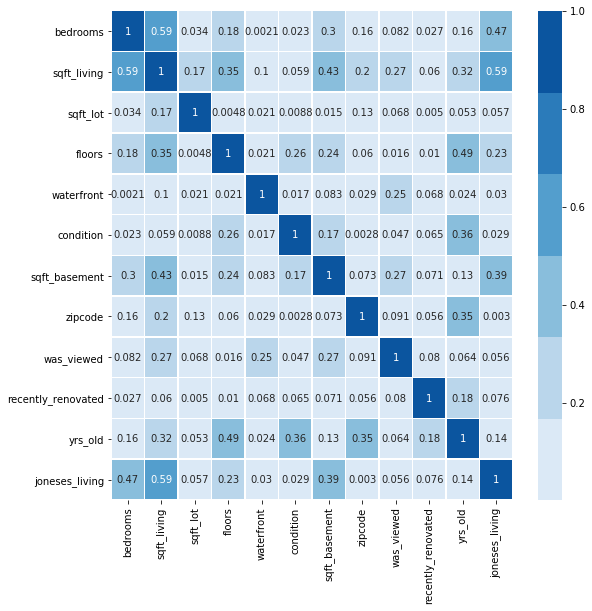

In [3]:
#Dropped all variables we aren't using (e.g. lat/long) or that are highly correlated (e.g. sqft_above, bathrooms, grade)
df_deps = df.drop(['id','price','lat','long','yr_renovated', 'yr_built','sqft_lot15','sqft_living15','sqft_above','bathrooms','grade','joneses_lot','view'], axis = 1)

#Check for correlation among candidate dependent variables
corr = df_deps.corr()
pl.figure(figsize=(9,9))
sns.heatmap(data=np.abs(corr), cmap=sns.color_palette('Blues'), annot=True, linewidths = .5)

**All correlations between candidate indepentent variables are <0.6 in magnitude**

Below - lets check the extent to which the candidate independent variables are normally distributed, skewed, and their linear relationship with price.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


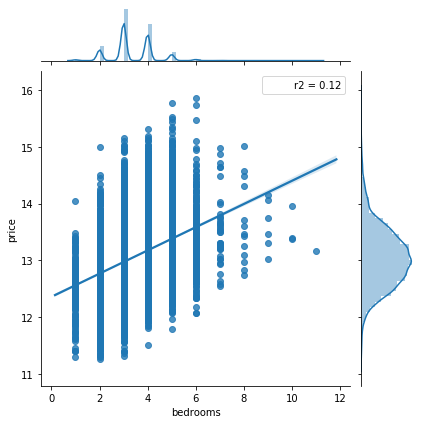

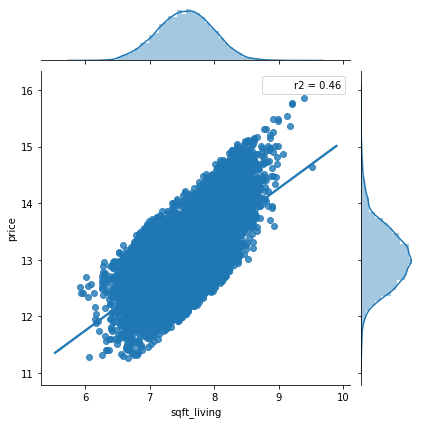

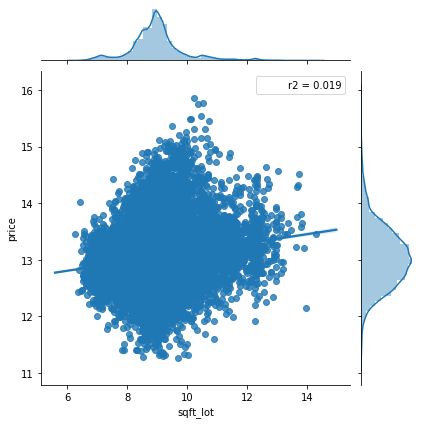

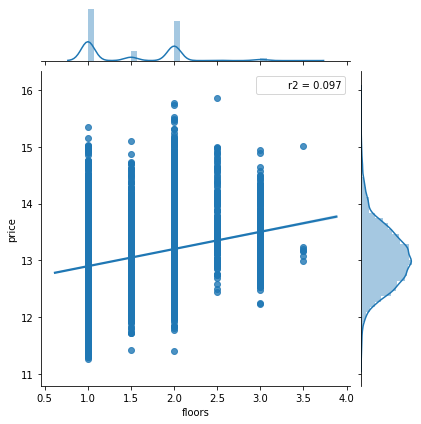

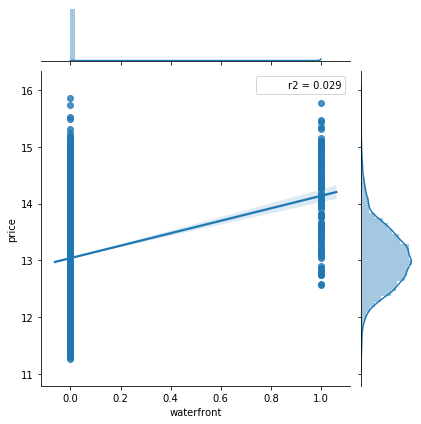

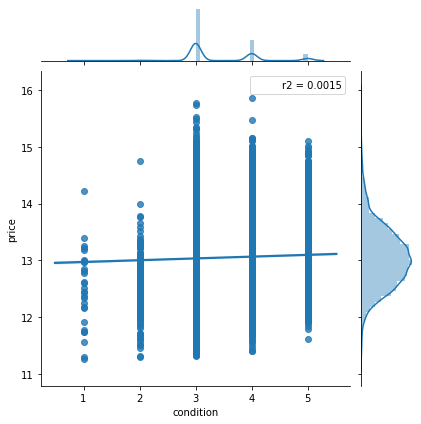

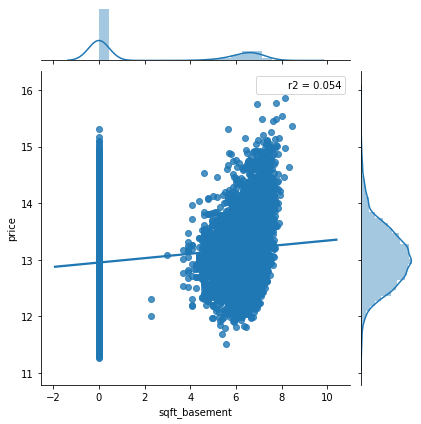

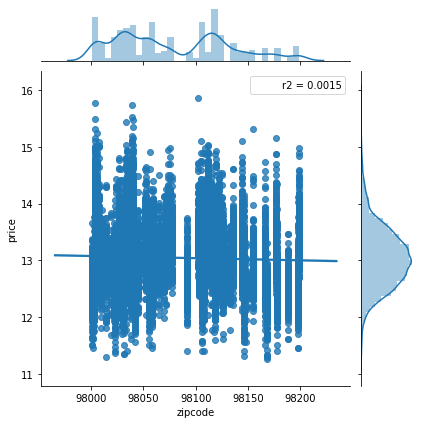

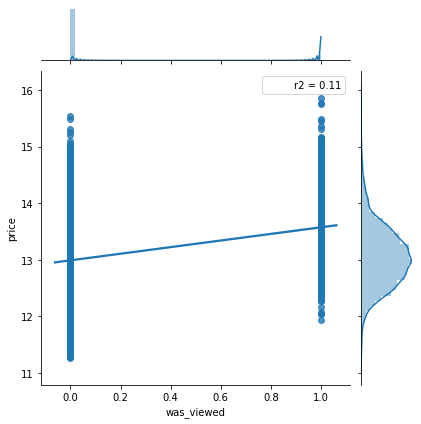

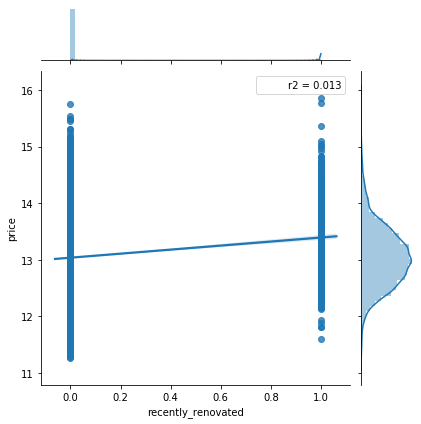

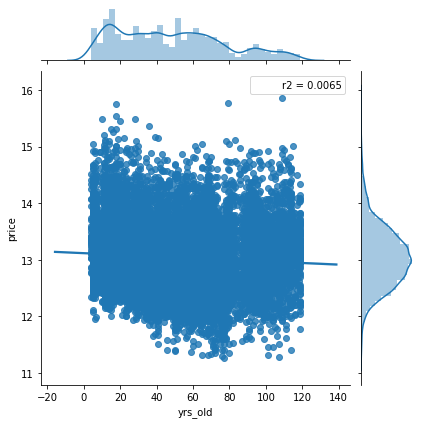

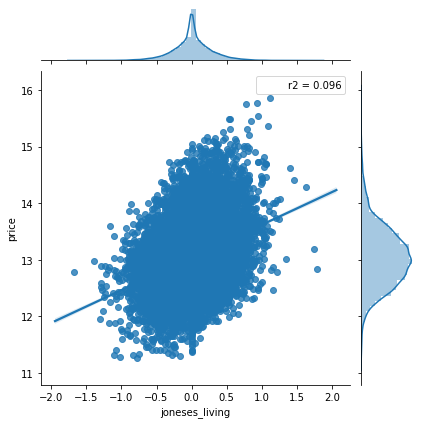

In [4]:
df_deps_price = df_deps
df_deps_price['sqft_living'] = np.log(df_deps_price['sqft_living'])
df_deps_price['sqft_lot'] = np.log(df_deps_price['sqft_lot'])
df_deps_price['sqft_basement'] = np.log(df_deps_price['sqft_basement'])
df_deps_price['price'] = np.log(df['price'])

#sns.set(style="ticks")
#sns.pairplot(df_deps_price,x_vars=list(df_deps.columns),y_vars=["price"])
x_vars=list(df_deps.columns)

#https://stackoverflow.com/questions/25579227/seaborn-implot-with-equation-and-r2-text
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

for i in range(1,13):
    sns.jointplot(x=x_vars[i], y="price", data=df_deps_price, kind='reg', stat_func=r2) 


**Sqft_basement has issues with its several thousand homes that don't have a noted basement size value - it is creating an unusual bimodal distribution - we will remove this variable for the final regression.  Several variables have a more linear relationship between their log-transformed value and the log-transformed price - e.g. the sqft values for lot and living space, so we will use the long transformed values in our analysis**

<div class="alert alert-block alert-info">

## 3. Narrow Down Variables, Transform Variables 
    - Kill off obvious unusable variables  
    - Evaluate normality of target variables  
    - Decide on transformations / normalizations / standardizations  

<div class="alert alert-block alert-info">

|**Category**| Description | _Detail & Transformations_|
|---:|:---:|:---|
|**id** | dropped | |
|**date** | dropped  | |
| **price** |  **kept** |_dependent variable - log transformed_|
| **bedrooms** |  dropped |  |
| **bathrooms** |  droped |   |
| **sqft_living** |  **kept**| _log transformed_ |
| **sqft_lot** |  **kept** | _log transformed_ |
| **floors** |  **kept** |  |
| **waterfront** | **kept** | _binary_ |
| **view** | dropped  |  |
| **was_viewed** | **constructed** | _binary was viewed between 1 and 4 times_ |
| **condition** | **kept**| |
| **grade** | dropped | |
| **sqft_above** | dropped | |
| **sqft_basement** | **kept** | |
| **yr_built** | dropped | |
| **yrs_old** | dropped | originally included, but condition number of regresion was 1.66e+03, indicating potential collinearity |
| **yr_renovated** | dropped | |
| **recently_renovated** | **constructed** |_binary - if rennovated after 1980, 1, otherwise, 0_|
| **zipcode** | **kept** |_categorical_|
| **lat** | dropped | |
| **long** | dropped | |
| **sqft_living15** | dropped | |
| **sqft_lot15** | dropped|  |
| **joneses_living** | **constructed** | _difference between log(sqft_living) and log(sqft_living15), or living space relative to closest 15 neighbors_ |


**Goal**: create a new DataFrame with just the variables we will use in the regressions, with zipcode as a column for future grouping

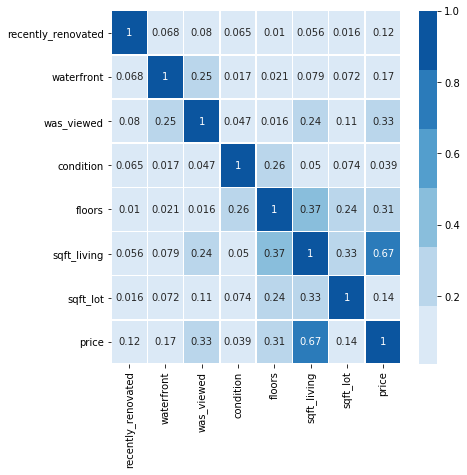

In [5]:
# Pulling in variables and transformations

#Importing several data fields as-is (converting zipcode to string from numeric)
df_reg = df[['recently_renovated','waterfront','zipcode','was_viewed','condition','floors']].copy()
df_reg['zipcode'] = df_reg['zipcode'].astype('str')
# 'yrs_old',

# sqft_living has a long tail for extreme high values - using log to normalize
df_reg['sqft_living'] = np.log(df['sqft_living'])

# sqft_lot has a long tail for extreme high values - using log to normalize
df_reg['sqft_lot'] = np.log(df['sqft_lot'])

# joneses_living pulling in as-is, it is already log-transformed
#df_reg['joneses_living'] = df['joneses_living']

# Originally, price was the dependent variable, but using the log of price as the outcome fixed skewness / kurtosis / heteroskedasticity issues
df_reg['price'] = np.log(df['price'])

corr_reg = df_reg.corr()
pl.figure(figsize=(6.5,6.5))
sns.heatmap(data=np.abs(corr_reg), cmap=sns.color_palette('Blues'), annot=True, linewidths = .5)


#np.exp(df_reg['price']).describe()

<div class="alert alert-block alert-info">

## 4. Run Core Analyses
    - Create core multivariate analysis  
    - Create grouped multivariate analyses  
    - Evaluate statistical validity (p-values, skewness, kurtosis)  
    - Evaluate applicability (size of the effect, direction, does it make sense     

<div class="alert alert-block alert-info">

In [6]:
# Creating a formula to run a multivariate regression of all values in a regression, ignoring a single group column (zipcode)
def regress_grouped(data, outcome_val, group_col):
    outcome = outcome_val
    predictors = data.drop([outcome,group_col], axis=1)
    pred_sum = "+".join(predictors.columns)
    formula = outcome + "~" + pred_sum
    model = ols(formula= formula, data=data).fit()
    return model

regress_all = regress_grouped(df_reg, 'price', 'zipcode')
regress_all.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     3273.
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:53:13   Log-Likelihood:                -8981.4
No. Observations:               21596   AIC:                         1.798e+04
Df Residuals:                   21588   BIC:                         1.804e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.1654      0.049    144.839      0.000       7.068       7.262
recently_renovated     0.2125      0.015     14.387      0.000       0.184       0.241
waterfront             0.5126      0.032     16.251      0.000       0.451       0.574
was_viewed             0.2792      0.009     31.181      0.000       0.262       0.297
condition              0.0752      0.004     18.812      0.000       0.067       0.083
floors                 0.0790      0.006     14.020      0.000       0.068       0.090
sqft_living            0.7791      0.007    106.608      0.000       0.765       0.793
sqft_lot              -0.0458      0.003    -14.278      0.000      -0.052      -0.040
==============================================================================
Omnibus:                       53.344   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.345
Skew:                           0.070   Prob(JB):                     5.24e-11
Kurtosis:                       2.819   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS Regression Results Discussion:  
- The variables are all exhibit very low p-values (<0.001) and the overall adjusted r-squared is high (54.7%), indicating that the dependent variables are explaining a high proportion of the variance and are all individually correlated
- Skew is <2 and Kurtosis is <3, indicating limited unusual residual patterning
- The value and direction of the intercepts largely follows intuition
    - **sqft_living** has the highest positive coefficient of 1.06, which follows as house size is generally a key factor in house price
    - **waterfront** surprisingly has a high coefficient of 0.5, but only a very small number of houses (<1%) have this, so it likely is a significant but not highly explanatory factor
    - **recently_renovated** and was_viewed are both high positive factors of 0.25 and 0.23 respectively - these make sense as more modern and more in-demand houses likely drive higher prices
    - **floors** and **condition** both had low positive coefficients, so are of relatively lower importance
- Some coefficients, however, cut against intuition
    - **sqft_lot** also has a slightly negative correlation with housing price (-0.07) - this I attribute to houses with large lots being in more distant and suburban / rural areas further from main centers of employment.  However, we can check this by analyzing houses within specific zip codes further on

In [7]:
df_reg_zipdummy = df_reg.copy()
df_reg_zipdummy['zipcode'] = 'zip'+df_reg_zipdummy['zipcode']
zipdummies = pd.get_dummies(df_reg_zipdummy.zipcode, drop_first = True)
for column in zipdummies:
    df_reg_zipdummy[column]=zipdummies[column]

regress_zipdummies = regress_grouped(df_reg_zipdummy, 'price', 'zipcode')

regress_zipdummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1633.
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:53:13   Log-Likelihood:                 3857.7
No. Observations:               21596   AIC:                            -7561.
Df Residuals:                   21519   BIC:                            -6947.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.9455      0.033    209.737      0.000       6.881       7.010
recently_renovated     0.0688      0.008      8.335      0.000       0.053       0.085
waterfront             0.5975      0.018     33.803      0.000       0.563       0.632
was_viewed             0.1929      0.005     37.209      0.000       0.183       0.203
condition              0.0308      0.002     13.504      0.000       0.026       0.035
floors                 0.0742      0.003     22.654      0.000       0.068       0.081
sqft_living            0.6162      0.004    141.979      0.000       0.608       0.625
sqft_lot               0.0768      0.002     35.383      0.000       0.073       0.081
zip98002              -0.0270      0.018     -1.505      0.132      -0.062       0.008
zip98003               0.0459      0.016      2.840      0.005       0.014       0.078
zip98004               1.2392      0.016     78.942      0.000       1.208       1.270
zip98005               0.8333      0.019     43.831      0.000       0.796       0.871
zip98006               0.7619      0.014     53.915      0.000       0.734       0.790
zip98007               0.7158      0.020     35.501      0.000       0.676       0.755
zip98008               0.6930      0.016     42.843      0.000       0.661       0.725
zip98010               0.2319      0.023     10.083      0.000       0.187       0.277
zip98011               0.4857      0.018     26.923      0.000       0.450       0.521
zip98014               0.2788      0.021     13.102      0.000       0.237       0.321
zip98019               0.3106      0.018     17.049      0.000       0.275       0.346
zip98022               0.0400      0.017      2.331      0.020       0.006       0.074
zip98023               0.0081      0.014      0.577      0.564      -0.019       0.036
zip98024               0.4217      0.025     16.702      0.000       0.372       0.471
zip98027               0.5658      0.015     38.616      0.000       0.537       0.595
zip98028               0.4388      0.016     27.236      0.000       0.407       0.470
zip98029               0.6945      0.016     44.337      0.000       0.664       0.725
zip98030               0.0650      0.017      3.921      0.000       0.032       0.097
zip98031               0.0889      0.016      5.464      0.000       0.057       0.121
zip98032              -0.0123      0.021     -0.584      0.559      -0.054       0.029
zip98033               0.8533      0.014     58.857      0.000       0.825       0.882
zip98034               0.5766      0.014     41.824      0.000       0.550       0.604
zip98038               0.1851      0.014     13.628      0.000       0.158       0.212
zip98039               1.4746      0.031     48.017      0.000       1.414       1.535
zip98040               0.9967      0.0

### OLS Regression With Zipcode Dummies Results Discussion:

The core independent variables continue to exhibit very low p-values (<0.001) and the overall adjusted r-squared is significantly higher (86.1%) with the inclusion of zipcode dummy variables than without (54.7%), indicating that the zipcode variables are explaining a high proportion of the variance in housing prices beyond the individual home factors.

Several of the core independent variable coefficients change with the addition of zip code dummy variables, indicating that these variables previously were capturing latent charactaristics of zip codes rather than the actual incremental contribution of the variable to overall housing price:
- Generally, values either slightly attenuated or slightly improved. My interpretation of values that slighly attenuated are that the value (e.g. recently_renovated, which fell from 0.24 to 0.09) was previously an indicator of the uncaptured quality of the neighborhood (i.e. demand factors from buyers with higher general willingness to pay).  
- By contrast, the single value that increased slightly between the two regressions, **waterfront**, is an important indicator of house price that was being slightly obscured without being able to sort out the relative impact of zip code.
- One value flipped direction - **sqft_lot**, from slightly negative at -0.72 to slightly positive at 0.65 and my interpretation of this metric is that previously high sqft_lot values were capturing properties further from city centers, and that distance from shopping / businesses was decreasing value faster that large lot size was adding value.  However, by pulling out the level effect of zip codes from the analysis, we are able to isolate the positive effect of **sqft_lot**.
- Almost all of the zip code coefficients have very low p-values (<0.001), except for a few that exhibited both very low coefficient values and high p-values. Because we dropped the first zipcode from the list, that zipcode coefficient is already accounted for in the intercept value. These zip codes with close-to-zero coeficients and high p-values likely have values statistically indistinguishable from the first zip code that was dropped.  We should see these zip codes change back to non-zero values with low p-values if we change the zipcode we decided to drop.

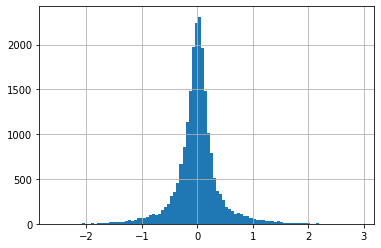

In [8]:
#df_reg_zipdummy = df_reg.copy()
intercept = regress_zipdummies.params[0]
coeff_names = list(regress_zipdummies.params.keys())[1:]
coeff_values = list(regress_zipdummies.params)[1:]
xvar_array = df_reg_zipdummy.drop(['price','zipcode'], axis=1)

predicted = np.dot(np.array(xvar_array),np.array(coeff_values))+intercept
df_predicted = pd.DataFrame(predicted)
df_predicted.describe()

df_reg_zipdummy['predicted'] = df_predicted
df_reg_zipdummy['residual'] = df_reg_zipdummy['price'] - df_reg_zipdummy['predicted']

df_reg_zipdummy['residual'].hist(bins=100)

<div class="alert alert-block alert-info">

## 5. Run Checks & Create Visuals   
    - Check alternate models, check alternate explanations of effects
    - Create easy to consume graphs / maps of data

<div class="alert alert-block alert-info">

Avg Zip Premium:  0.8262006721856971
Median Zip Premium:  0.6908629880306909

Lowest Zip Premium
------------------------------------------------------------
                0 zipcode      price         sqft         price$  zip_impact  \
zip98106  0.37075   98106  12.627789  1376.973542  304915.250997    0.448821   

           zip_premium  premium_percent  zip_premium_log  premium_percent_log  
zip98106  97458.431564         0.319625              0.0                  0.0  

Middle Zip Premium
------------------------------------------------------------
                 0 zipcode      price         sqft         price$  zip_impact  \
zip98107  0.913723   98107  13.227026  1485.557230  555167.798098    1.493590   
zip98126  0.589002   98126  12.895722  1413.013825  398603.455752    0.802190   
zip98168  0.053644   98168  12.344468  1368.767045  229685.805177    0.055109   

            zip_premium  premium_percent  zip_premium_log  premium_percent_log  
zip98107  335530.410398         0.

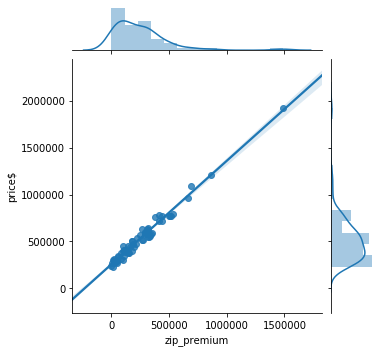

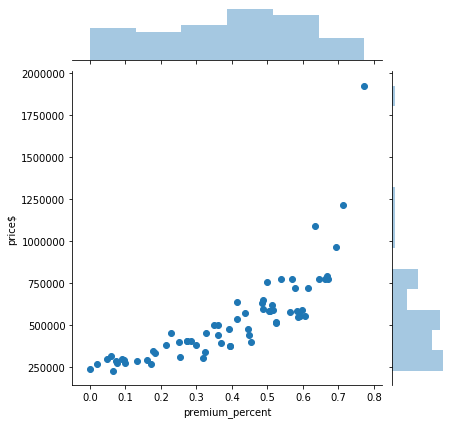

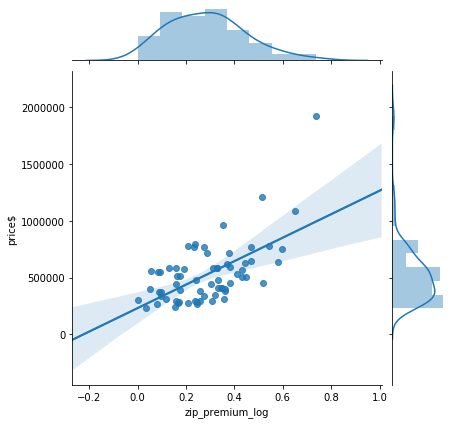

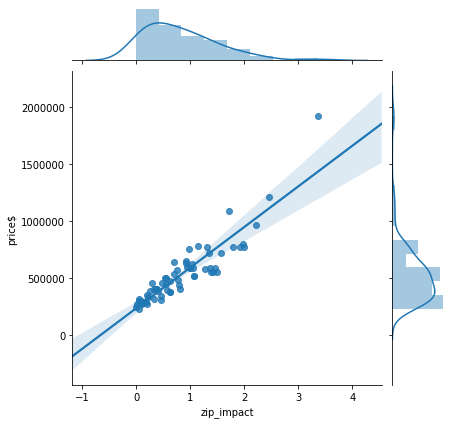

In [25]:

zip_intercept = regress_zipdummies.params[0]

def last_5_slice(x):
    sliced = x[3:]
    return sliced

df_reg_grouped = df_reg.groupby('zipcode')

def average_price_fromzip(zipcode):
    zip_data = df_reg_grouped.get_group(name = zipcode)
    avg_price =  zip_data['price'].mean()
    return avg_price

def average_sqft_fromzip(zipcode):
    zip_data = df_reg_grouped.get_group(name = zipcode)
    avg_price =  zip_data['sqft_living'].mean()
    return avg_price

#Creating zip-code level summaries of price, zipcode coefficient in dollars, and sqfootage
zip_params = pd.DataFrame(regress_zipdummies.params[10:])
zip_params['zipcode'] = list(zip_params.index)
zip_params['zipcode'] = zip_params['zipcode'].apply(last_5_slice)
zip_params['price'] = 0 
zip_params['price'] = zip_params['zipcode'].apply(average_price_fromzip)
zip_params['sqft'] = 0 
zip_params['sqft'] = np.exp(zip_params['zipcode'].apply(average_sqft_fromzip))
zip_params['price$'] = np.exp(zip_params['price'])

zip_params['zip_impact'] = (np.exp(zip_params[0])-1)

zip_params['zip_premium'] = zip_params['price$']-np.exp(zip_params['price']-zip_params[0])
zip_params['zip_premium'] = zip_params['zip_premium'] - min(zip_params['zip_premium'])
zip_params['premium_percent'] = zip_params['zip_premium'] / zip_params['price$']

zip_params['zip_premium_log'] = zip_params['price']-zip_params[0]
zip_params['zip_premium_log'] = zip_params['zip_premium_log'] - min(zip_params['zip_premium_log'])
zip_params['premium_percent_log'] = zip_params['zip_premium_log'] / (zip_params['price'] - regress_zipdummies.params[0])

#print(zip_params['zip_premium'].median())

#zip_params.hist('premium_percent')

#premium_price_graph = sns.jointplot(x='zip_premium', y="price$", data=zip_params, height = 10)

premium_price_simple = sns.jointplot(x="zip_premium", y="price$", data=zip_params, height=5, kind='reg')

premium_percent_graph = sns.jointplot(x='premium_percent', y="price$", data=zip_params, kind = 'scatter')

premium_percent_graph = sns.jointplot(x='zip_premium_log', y="price$", data=zip_params, kind = 'reg')

premium_percent_graph = sns.jointplot(x='zip_impact', y="price$", data=zip_params, kind = 'reg')


print('Avg Zip Premium: ',zip_params['zip_impact'].mean())
print('Median Zip Premium: ',zip_params['zip_impact'].median())
#>>> df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

#Showing Zips by permium percentage grouping
print("\nLowest Zip Premium")
print("---"*20)
print(zip_params.loc[(zip_params['zip_premium_log']<.025)])
print("\nMiddle Zip Premium")
print("---"*20)
print(zip_params.loc[(zip_params['zip_premium_log']<.065)&(zip_params['zip_premium_log']>.025)])
print("\nHigh Zip Premium")
print("---"*20)
print(zip_params.loc[(zip_params['zip_premium_log']>.065)])

<div class="alert alert-block alert-info">

## 6. Conclusion & Recommendations  

<div class="alert alert-block alert-info">

We've segmented King County into three tiers of zip codes - those with the highest percentage of their home value predicted by neighborhood, the lowest, and those between -- approximately the top, bottom, and middle two quartiles. These three categories will for the basis for our recommendation that our investor prioritize the zip codes with the 15 lowest percentage of home value coming from non-home characteristics, as we expect these to drive the highest rental cash rate per investment dollar. These tiers are meaningful because they correspond to different rates of zipcode premium - <2% on average for the bottom tier of zip coes and ~8% for the top tier of zip codes.  These values may be small, but in aggregate over a large investment they should be impactful.

Several key next steps remain in this analysis - primarily:
1. Comparison analysis of different ways of grouping houses by geography – do results persist? Are there more accurate groupings?
    - Zip code vs. long/lat binning
    - Mapping socially understood “neighborhoods”, e.g. “Pac Heights” vs the “Tenderloin” in SF are not captured in zip codes  
<br>
2. What elements of the zip code premium can be explained by other quantitative factors?
    - Distance to work areas / transit options
    - School quality
    - Unexamined house quality factors

